In [14]:
import pandas as pd
import numpy as np
from sklearn import * 
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

%matplotlib inline

In [3]:
df = pd.read_csv("/data/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
features = ["SepalLengthCm", "PetalLengthCm"]

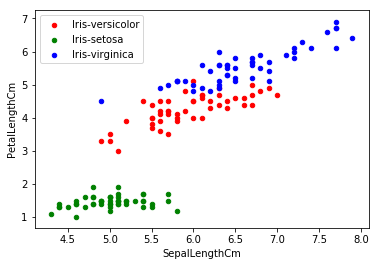

In [12]:
fig, ax = plt.subplots()
df[df.Species == "Iris-versicolor"].plot.scatter(features[0], features[1],
                                        color = "Red", ax = ax, label = "Iris-versicolor")
df[df.Species == "Iris-setosa"].plot.scatter(features[0], features[1],
                                        color = "Green", ax = ax, label = "Iris-setosa")
df[df.Species == "Iris-virginica"].plot.scatter(features[0], features[1],
                                        color = "Blue", ax = ax, label = "Iris-virginica")

Test accuracy:  1.0


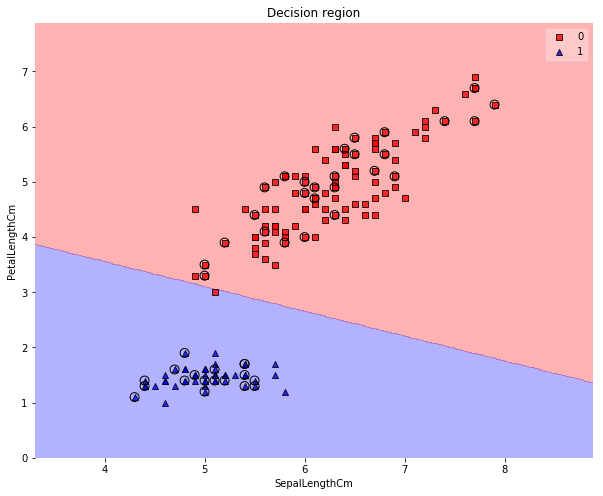

In [21]:
y = np.where(df.Species == "Iris-setosa", 1, 0)
X = df[features].values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                            test_size = 0.3, random_state = 123)
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

pipe.score(X_test, y_test)
plt.figure(figsize=(10, 8))
plot_decision_regions(X, y, pipe, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("Decision region")
print("Test accuracy: ", pipe.score(X_test, y_test))

Test accuracy:  0.9333333333333333


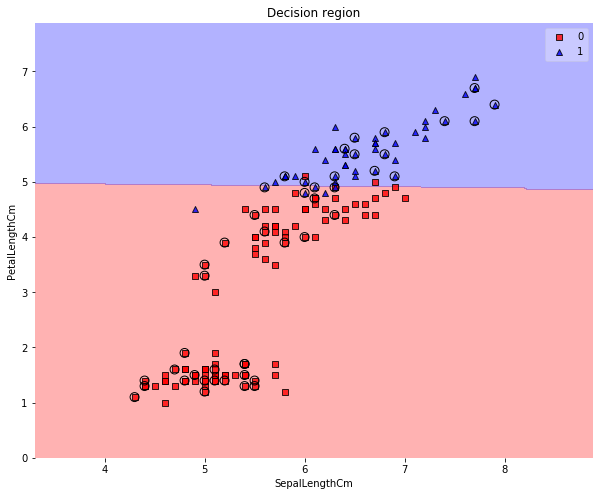

In [22]:
y = np.where(df.Species == "Iris-virginica", 1, 0)
X = df[features].values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                            test_size = 0.3, random_state = 123)
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

pipe.score(X_test, y_test)
plt.figure(figsize=(10, 8))
plot_decision_regions(X, y, pipe, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("Decision region")
print("Test accuracy: ", pipe.score(X_test, y_test))

Test accuracy:  0.6888888888888889


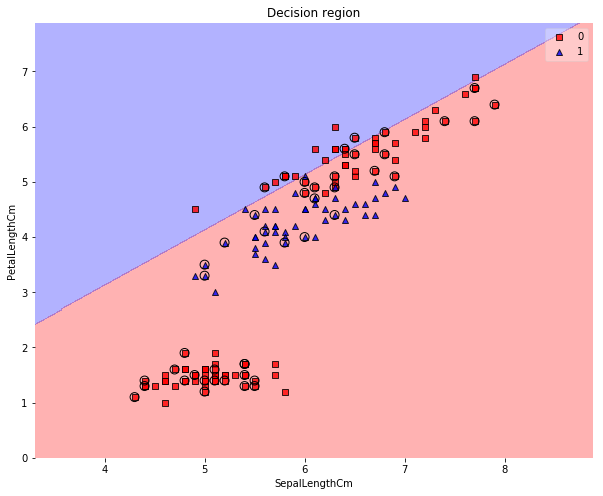

In [23]:
y = np.where(df.Species == "Iris-versicolor", 1, 0)

X = df[features].values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                            test_size = 0.3, random_state = 123)
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

pipe.score(X_test, y_test)
plt.figure(figsize=(10, 8))
plot_decision_regions(X, y, pipe, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("Decision region")
print("Test accuracy: ", pipe.score(X_test, y_test))

In [27]:
pd.Series(y_train).value_counts()/len(y_train)

0    0.619048
1    0.380952
dtype: float64

In [28]:
pd.Series(y_test).value_counts()/len(y_test)

0    0.777778
1    0.222222
dtype: float64

Test accuracy:  0.9111111111111111


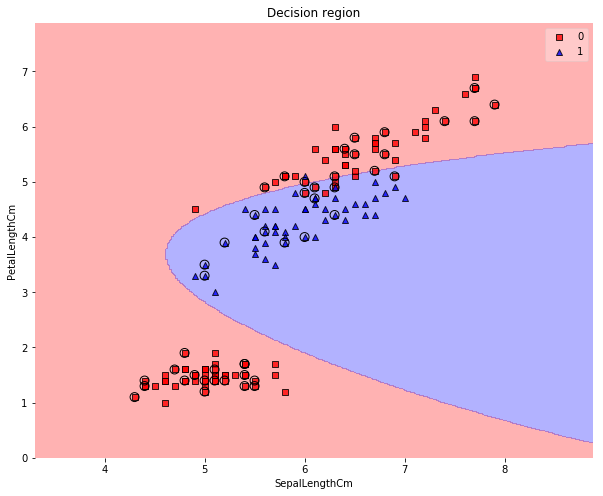

In [32]:
y = np.where(df.Species == "Iris-versicolor", 1, 0)

X = df[features].values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                            test_size = 0.3, random_state = 123)
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=5, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

pipe.score(X_test, y_test)
plt.figure(figsize=(10, 8))
plot_decision_regions(X, y, pipe, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("Decision region")
print("Test accuracy: ", pipe.score(X_test, y_test))

In [36]:
y = np.where(df.Species == "Iris-versicolor", 1, 0)
X = df.iloc[:, 1:-1]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                            test_size = 0.3, random_state = 123)
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Test accuracy: ", pipe.score(X_test, y_test))

Test accuracy:  0.9555555555555556


In [45]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(df.Species) 
X = df.iloc[:, 1:-1]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                            test_size = 0.3, random_state = 123)
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Test accuracy: ", pipe.score(X_test, y_test))

Test accuracy:  0.9555555555555556


In [44]:
res = pd.DataFrame({"actual": y_test, "predict": y_test_pred})
res["match"] = res.actual == res.predict
res.groupby(["actual", "match"]).count().unstack()

predict      
match    False True 
actual              
0          NaN  18.0
1          NaN  10.0
2          2.0  15.0

In [46]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)